In [7]:
%matplotlib inline
import matplotlib.pylab as plt
from pandas import *
import pandas
import numpy as np
from IPython.display import display

In [11]:

def side_by_side(*objs, **kwds):
    from pandas.core.common import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)
pandas.set_option('display.notebook_repr_html', False)



Series
======

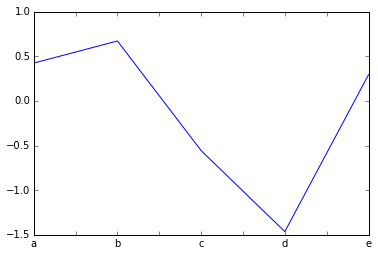

In [4]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series(np.random.randn(5), index=labels)

s.plot()

In [10]:
mapping = s.to_dict()
mapping

{'a': -0.30810309680894082,
 'b': 1.0827526353370547,
 'c': 0.69470445402837211,
 'd': 2.0460339967425298,
 'e': 0.76372403262158062}

DataFrame: 2D collection of Series
==================================

In [12]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

          a    b         c    d
0  0.056218  foo  0.502244  NaN
1 -0.414116  bar  1.536725  NaN
2 -0.001731  foo -1.736894  NaN
3  0.564440  bar -0.085081  NaN
4 -0.093237  foo -0.008953  NaN
5  0.683041  bar -1.118945  NaN

In [15]:
df.ix[2:4:2,'b':'c']

     b         c
2  foo -1.736894
4  foo -0.008953

In [22]:
sd = df['c'] > 0
sd

0     True
1     True
2    False
3    False
4    False
5    False
Name: c, dtype: bool

In [20]:
df[sd]

          a    b         c    d
0  0.056218  foo  0.502244  NaN
1 -0.414116  bar  1.536725  NaN

In [16]:
df.xs(3)

a    -2.060714
b          bar
c    0.7256144
d          NaN
Name: 3, dtype: object

Creation from nested dicts
--------------------------

These arise naturally in Python code

In [25]:
df

          a    b         c    d
0  0.056218  foo  0.502244  NaN
1 -0.414116  bar  1.536725  NaN
2 -0.001731  foo -1.736894  NaN
3  0.564440  bar -0.085081  NaN
4 -0.093237  foo -0.008953  NaN
5  0.683041  bar -1.118945  NaN

In [26]:
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = np.random.randn()

data


{'bar': {'a': 1.5521474686702428,
  'b': -0.5781298292620497,
  'c': -1.2765761054215583,
  'd': 1.159291571815306},
 'baz': {'a': 0.12418436321809384,
  'b': 0.5173538258241729,
  'c': -0.5668963820766588,
  'd': -0.7236611973095713},
 'foo': {'a': 0.48504610080231364,
  'b': -0.17481019562650194,
  'c': 1.3143705909862518,
  'd': -0.0753552510503296}}

In [27]:
DataFrame(data)

        bar       baz       foo
a  1.552147  0.124184  0.485046
b -0.578130  0.517354 -0.174810
c -1.276576 -0.566896  1.314371
d  1.159292 -0.723661 -0.075355

Data alignment
==============

In [32]:
close_px = read_csv('stock_data.csv',index_col=0, parse_dates=True)
close_px.head(3)

               AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM
2007-10-29  37.41  185.09  34.46  106.78  57.13  31.78  65.67  1540.98  85.51
2007-10-30  36.43  187.00  34.39  106.15  56.99  32.70  65.80  1531.02  83.25
2007-10-31  36.79  189.95  34.97  108.01  57.30  33.84  65.69  1549.38  84.03

In [33]:
s1 = close_px['AAPL'][-20:]
s2 = close_px['AAPL'][-25:-10]
side_by_side(s1, s2)

2011-09-19    411.63          2011-09-12    379.94      
2011-09-20    413.45          2011-09-13    384.62      
2011-09-21    412.14          2011-09-14    389.30      
2011-09-22    401.82          2011-09-15    392.96      
2011-09-23    404.30          2011-09-16    400.50      
2011-09-26    403.17          2011-09-19    411.63      
2011-09-27    399.26          2011-09-20    413.45      
2011-09-28    397.01          2011-09-21    412.14      
2011-09-29    390.57          2011-09-22    401.82      
2011-09-30    381.32          2011-09-23    404.30      
2011-10-03    374.60          2011-09-26    403.17      
2011-10-04    372.50          2011-09-27    399.26      
2011-10-05    378.25          2011-09-28    397.01      
2011-10-06    377.37          2011-09-29    390.57      
2011-10-07    369.80          2011-09-30    381.32      
2011-10-10    388.81          Name: AAPL, dtype: float64
2011-10-11    400.29                                    
2011-10-12    402.19           

In [26]:
s1 + s2

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL, dtype: float64

In [34]:
# Select last 10 rows and first 3 columns
df = close_px.ix[-10:, :3]
df

               AA    AAPL     GE
2011-10-03   8.90  374.60  14.69
2011-10-04   9.12  372.50  14.86
2011-10-05   9.37  378.25  15.27
2011-10-06   9.88  377.37  15.53
2011-10-07   9.71  369.80  15.50
2011-10-10  10.09  388.81  16.14
2011-10-11  10.30  400.29  16.14
2011-10-12  10.05  402.19  16.40
2011-10-13  10.10  408.43  16.22
2011-10-14  10.26  422.00  16.60

In [35]:

side_by_side(s1.reindex(s2.index), s2)


2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [38]:
s1.align?

In [39]:
# Join both s1 and s2 on the same index where the index are same.
b, c  = s1.align(s2, join='inner')

side_by_side(b, c)


2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [41]:
#Join both s1 and s2 on all index 

b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2

In [44]:
# Join on the index on the right
b, c  = s1.align(s2, join='right')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [41]:
# Select last 10 rows with specific columns
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

              AAPL     IBM   MSFT
2011-10-03  374.60  173.29  24.53
2011-10-04  372.50  174.74  25.34
2011-10-05  378.25  176.85  25.89
2011-10-06  377.37  181.69  26.34
2011-10-07  369.80  182.39  26.25
2011-10-10  388.81  186.62  26.94
2011-10-11  400.29  185.00  27.00
2011-10-12  402.19  186.12  26.96
2011-10-13  408.43  186.82  27.18
2011-10-14  422.00  190.53  27.27

In [42]:
# 
df2 = df.ix[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2011-10-03  173.29  24.53
2011-10-04  372.50  174.74  25.34    2011-10-05  176.85  25.89
2011-10-05  378.25  176.85  25.89    2011-10-07  182.39  26.25
2011-10-06  377.37  181.69  26.34    2011-10-11  185.00  27.00
2011-10-07  369.80  182.39  26.25    2011-10-13  186.82  27.18
2011-10-10  388.81  186.62  26.94                             
2011-10-11  400.29  185.00  27.00                             
2011-10-12  402.19  186.12  26.96                             
2011-10-13  408.43  186.82  27.18                             
2011-10-14  422.00  190.53  27.27                             


In [43]:
df + df2

            AAPL     IBM   MSFT
2011-10-03   NaN  346.58  49.06
2011-10-04   NaN     NaN    NaN
2011-10-05   NaN  353.70  51.78
2011-10-06   NaN     NaN    NaN
2011-10-07   NaN  364.78  52.50
2011-10-10   NaN     NaN    NaN
2011-10-11   NaN  370.00  54.00
2011-10-12   NaN     NaN    NaN
2011-10-13   NaN  373.64  54.36
2011-10-14   NaN     NaN    NaN

In [48]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

               IBM   MSFT                   IBM   MSFT
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18


Transposing: no copy if all columns are same type
-------------------------------------------------

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [28]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=False)
#Observe the date column
close_px.head(3)

                        AA    AAPL     GE     IBM    JNJ   MSFT    PEP  \
2007-10-29 00:00:00  37.41  185.09  34.46  106.78  57.13  31.78  65.67   
2007-10-30 00:00:00  36.43  187.00  34.39  106.15  56.99  32.70  65.80   
2007-10-31 00:00:00  36.79  189.95  34.97  108.01  57.30  33.84  65.69   

                         SPX    XOM  
2007-10-29 00:00:00  1540.98  85.51  
2007-10-30 00:00:00  1531.02  83.25  
2007-10-31 00:00:00  1549.38  84.03  

In [36]:
df[:5].T

      2011-10-03  2011-10-04  2011-10-05  2011-10-06  2011-10-07
AA          8.90        9.12        9.37        9.88        9.71
AAPL      374.60      372.50      378.25      377.37      369.80
GE         14.69       14.86       15.27       15.53       15.50

In [186]:
df[:5]

              AAPL     IBM   MSFT
2011-10-03  374.60  173.29  24.53
2011-10-04  372.50  174.74  25.34
2011-10-05  378.25  176.85  25.89
2011-10-06  377.37  181.69  26.34
2011-10-07  369.80  182.39  26.25

##### 

Columns can be any type
-----------------------

In [190]:
n = 10
foo = DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = pd.date_range('1/1/2000', periods=n)
foo

     floats  ints strings  bools    objects
0  0.560623     0     foo   True 2000-01-01
1  2.636365     1     bar   True 2000-01-02
2 -1.014473     2     foo  False 2000-01-03
3  0.068033     3     bar   True 2000-01-04
4  1.599826     4     foo   True 2000-01-05
5 -0.293990     5     bar  False 2000-01-06
6 -0.722114     6     foo  False 2000-01-07
7  0.808839     7     bar   True 2000-01-08
8  0.560575     8     foo   True 2000-01-09
9 -0.853130     9     bar  False 2000-01-10

In [191]:
foo.dtypes

floats            float64
ints                int64
strings            object
bools                bool
objects    datetime64[ns]
dtype: object

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [194]:
foo.T.T

       floats ints strings  bools              objects
0   0.5606232    0     foo   True  2000-01-01 00:00:00
1    2.636365    1     bar   True  2000-01-02 00:00:00
2   -1.014473    2     foo  False  2000-01-03 00:00:00
3  0.06803319    3     bar   True  2000-01-04 00:00:00
4    1.599826    4     foo   True  2000-01-05 00:00:00
5  -0.2939898    5     bar  False  2000-01-06 00:00:00
6  -0.7221136    6     foo  False  2000-01-07 00:00:00
7    0.808839    7     bar   True  2000-01-08 00:00:00
8   0.5605753    8     foo   True  2000-01-09 00:00:00
9  -0.8531297    9     bar  False  2000-01-10 00:00:00

In [34]:
foo.T.T.dtypes

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [196]:
df

              AAPL     IBM   MSFT
2011-10-03  374.60  173.29  24.53
2011-10-04  372.50  174.74  25.34
2011-10-05  378.25  176.85  25.89
2011-10-06  377.37  181.69  26.34
2011-10-07  369.80  182.39  26.25
2011-10-10  388.81  186.62  26.94
2011-10-11  400.29  185.00  27.00
2011-10-12  402.19  186.12  26.96
2011-10-13  408.43  186.82  27.18
2011-10-14  422.00  190.53  27.27

In [203]:
#Operations along the column
df.apply(np.mean, axis=0)

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [204]:
# Operations along the row
df.apply(np.mean, axis=1)

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

You can get as fancy as you want

In [210]:
df

              AAPL     IBM   MSFT
2011-10-03  374.60  173.29  24.53
2011-10-04  372.50  174.74  25.34
2011-10-05  378.25  176.85  25.89
2011-10-06  377.37  181.69  26.34
2011-10-07  369.80  182.39  26.25
2011-10-10  388.81  186.62  26.94
2011-10-11  400.29  185.00  27.00
2011-10-12  402.19  186.12  26.96
2011-10-13  408.43  186.82  27.18
2011-10-14  422.00  190.53  27.27

In [208]:
def peak_date(series):
    return series.index[series.argmax()]


# close_px.apply(peak_date)

In [209]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

AAPL    52.20
IBM     17.24
MSFT     2.74
dtype: float64

In [213]:
close_px.head(5)

               AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM
2007-10-29  37.41  185.09  34.46  106.78  57.13  31.78  65.67  1540.98  85.51
2007-10-30  36.43  187.00  34.39  106.15  56.99  32.70  65.80  1531.02  83.25
2007-10-31  36.79  189.95  34.97  108.01  57.30  33.84  65.69  1549.38  84.03
2007-11-01  35.22  187.44  34.27  105.72  56.85  34.07  64.51  1508.44  80.84
2007-11-02  35.83  187.87  34.27  106.59  56.95  34.07  65.03  1509.65  80.32

In [212]:
np.log(close_px).head(5)

                  AA      AAPL        GE       IBM       JNJ      MSFT  \
2007-10-29  3.621938  5.220842  3.539799  4.670771  4.045329  3.458837   
2007-10-30  3.595393  5.231109  3.537766  4.664853  4.042876  3.487375   
2007-10-31  3.605226  5.246761  3.554491  4.682224  4.048301  3.521644   
2007-11-01  3.561614  5.233459  3.534270  4.660794  4.040416  3.528417   
2007-11-02  3.578786  5.235750  3.534270  4.668990  4.042174  3.528417   

                 PEP       SPX       XOM  
2007-10-29  4.184642  7.340174  4.448633  
2007-10-30  4.186620  7.333689  4.421848  
2007-10-31  4.184947  7.345610  4.431174  
2007-11-01  4.166820  7.318831  4.392472  
2007-11-02  4.174849  7.319633  4.386019  

Plotting
========

Some basic plotting integration with matplotlib in Series / DataFrame

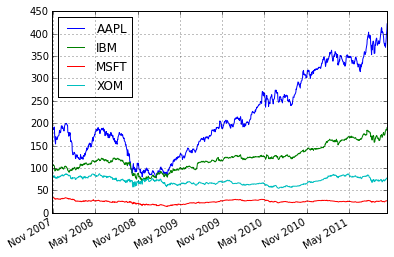

In [216]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']].plot()

NameError: name 'title' is not defined

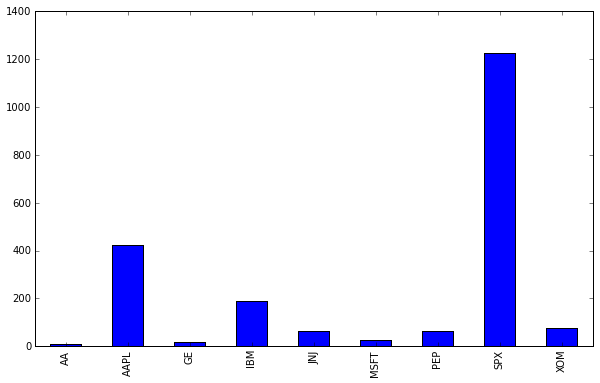

In [51]:
close_px.ix[-1].plot(kind='bar')
title('Prices on %s' % close_px.index[-1])
axhline(0)

Hierarchical indexing
---------------------

In [226]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

                  A         B         C
foo one   -0.953959  0.013781  0.533964
    two    1.246279 -0.929279  0.612959
    three  0.365386  0.063274  1.480561
bar one   -1.071836  0.478437  0.888813
    two   -0.205668  0.293777  0.761175
baz two   -0.596767 -1.008113  0.282919
    three  1.161677 -0.787552 -1.211408
qux one    0.005168  0.339505  1.444343
    two    1.193426  0.603880  0.743159
    three -1.040434  0.161953  0.959379

In [227]:
hdf.ix['foo']

              A         B         C
one   -0.953959  0.013781  0.533964
two    1.246279 -0.929279  0.612959
three  0.365386  0.063274  1.480561

In [228]:
hdf.ix['foo'] = 0
hdf

                  A         B         C
foo one    0.000000  0.000000  0.000000
    two    0.000000  0.000000  0.000000
    three  0.000000  0.000000  0.000000
bar one   -1.071836  0.478437  0.888813
    two   -0.205668  0.293777  0.761175
baz two   -0.596767 -1.008113  0.282919
    three  1.161677 -0.787552 -1.211408
qux one    0.005168  0.339505  1.444343
    two    1.193426  0.603880  0.743159
    three -1.040434  0.161953  0.959379

In [229]:
hdf.ix['foo', 'three']

A    0
B    0
C    0
Name: (foo, three), dtype: float64

Stacking and unstacking
-----------------------

In [13]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

                A         B                   A
              cat       dog       cat       dog
bar one  0.636315 -0.455435  0.377495 -0.463838
    two -0.129404  1.029732 -1.089901 -1.186203
baz one -0.828964 -0.078599 -0.291141 -1.744333
    two  0.445004  0.380419  0.121508  0.169416
foo one -1.279157  0.103584 -0.624276 -0.335667
    two  0.734647  1.147279  0.418432  1.811307
qux one  0.951668 -1.024283 -1.034424 -0.150006
    two -0.148614  1.349650 -0.586653 -0.672125

In [49]:
df2 = df.ix[[0, 1, 2, 4, 5, 7]]
df2

In [50]:
df.unstack()['B']

GroupBy
=======

In [51]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

In [52]:
for key, group in df.groupby('A'):
    print key
    print group

In [53]:
df.groupby('A')['C'].describe().T

In [54]:
df.groupby('A').mean()

In [55]:
for key, group in df.groupby('A'):
    print key
    print group

In [56]:
df.groupby(['A', 'B']).mean()

In [57]:
df.groupby(['A', 'B'], as_index=False).mean()

GroupBy example: linear regression by group
-------------------------------------------

In [58]:
import scikits.statsmodels.api as sm
rets = close_px / close_px.shift(1) - 1

def get_beta(rets):
    rets = rets.dropna()
    rets['intercept'] = 1.
    model = sm.OLS(rets['MSFT'], rets.ix[:, ['AAPL', 'intercept']]).fit()
    return model.params

get_beta(rets)

In [59]:
grouped = rets.groupby([lambda x: x.year, lambda x: x.month])
beta_by_ym = grouped.apply(get_beta)
beta_by_ym

In [60]:
beta_by_ym.unstack(0)['AAPL']

GroupBy with hierarchical indexing
----------------------------------

In [61]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [62]:
df.groupby(level=0, axis=0).mean()

In [63]:
df.stack()

In [64]:
df.stack().mean(1).unstack()

In [65]:
# could also have done
df.groupby(level=1, axis=1).mean()